# This file extract out the behavior and reachType from the .xlsx file


In [61]:
import pandas as pd
import numpy as np
import os
import shutil

## Modify these three variables as needed

In [62]:
root_path = r'G:\Grant\behavior_data\DLC_net' # change this to your root path where all the analysis folder live, i currently use is G:\Grant\behavior_data\DLC_net
root_folder = 'grant_reach10_swingDoor-christie' # change this to your root folder for one specfic mouse (this should contain multiple sessions)

# Set the specific mouse session to analyze
session_options = ['20250421_session001', '20250424_session001', '20250426_session001','20250429_session003','20250501_session001']

session_info = session_options[-1] # change this to the session you want to analyze
print(session_info)

20250501_session001


### Create new session_option for each session
- class that lets you load data for specific mouse sesssion

In [63]:
main_path = rf'{root_path}\{root_folder}'
print(f'main_path: {main_path}')

class select_mouse_session:
    def __init__(self, mouse, session_date, session_ID):
        self.mouse = mouse
        self.session_date = session_date
        self.session_ID = session_ID

    def __repr__(self):
        return f"Mouse: {self.mouse}, Session Date: {self.session_date}, Session ID: {self.session_ID}"
    
    def get_mouse_session_files(self):
        mouse_session = f"{self.mouse}_{self.session_date}_{self.session_ID}"
        xlsx_file = rf'{main_path}\Grant_curate\{self.session_date}_christielab_{self.session_ID}.xlsx'
        txt_file = rf"{main_path}\videos\{self.session_date}\christielab\{self.session_ID}\{self.session_date}_christielab_{self.session_ID}_events_shifted.txt"
        xlsx_orig = rf'{main_path}\Grant_curate\xlsx_backups\curator_direct_backup\{self.session_date}_christielab_{self.session_ID}.xlsx'
        
        return xlsx_file, txt_file, xlsx_orig
    
    def get_mouse_info(self):
        mouse_info = {
            'mouse': self.mouse,
            'session_date': self.session_date,
            'session_ID': self.session_ID
        }
        return mouse_info
    

# Strip the session info to get the session date and ID
session_date = session_info.split('_')[0]
session_ID = session_info.split('_')[1]

# Strip the mouse name from the root folder
mouse = root_folder.split('_')[1]

# Create an instance of the class with the mouse name, session date, and session ID
class_intsance = select_mouse_session(mouse='reach10', session_date=session_date, session_ID=session_ID)

# Get the mouse session files and info
xlsx_file, txt_file, xlsx_orig = class_intsance.get_mouse_session_files()
mouse_info = class_intsance.get_mouse_info()

# Print the results
print(f'mouse_info: {mouse_info}')
print(f'xlsx_file: {xlsx_file}')

main_path: G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie
mouse_info: {'mouse': 'reach10', 'session_date': '20250501', 'session_ID': 'session001'}
xlsx_file: G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie\Grant_curate\20250501_christielab_session001.xlsx


In [64]:
session_date = mouse_info['session_date']
session_ID = mouse_info['session_ID']
mouse = mouse_info['mouse']
session_save_name = f"{mouse}_{session_date}_{session_ID}"
print('⭐======================================⭐')
print(f'session_save_name: {session_save_name}')
print('')
print(f'mouse: {mouse}')
print(f'session_date: {session_date}')
print(f'session_ID: {session_ID}')


    # ---- Step 1: Make a backup in curator_backup folder
original_dir = os.path.dirname(xlsx_file)
backup_dir = os.path.join(original_dir, 'xlsx_backups',session_save_name,'reach_curator_direct_backup')
os.makedirs(backup_dir, exist_ok=True)
print(f'original_dir: {original_dir}')
print(f'backup_dir: {backup_dir}')
print('⭐======================================⭐')


⭐======================================⭐
session_save_name: reach10_20250501_session001

mouse: reach10
session_date: 20250501
session_ID: session001
original_dir: G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie\Grant_curate
backup_dir: G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie\Grant_curate\xlsx_backups\reach10_20250501_session001\reach_curator_direct_backup
⭐======================================⭐


In [65]:
final_df_backup = os.path.join(os.path.dirname(xlsx_file), 'xlsx_backups',session_save_name ,'final_backup')
final_df_backup_file_path = os.path.join(final_df_backup, os.path.basename(xlsx_file))

manual_curation_backup = os.path.join(os.path.dirname(xlsx_file),'xlsx_backups', session_save_name,'completed_manual_curation_backup')
manual_curation_backup = os.path.join(manual_curation_backup, os.path.basename(xlsx_file))

if os.path.exists(manual_curation_backup):
    print('⚠️ Looks like you have already completed the manual curation for this session ⚠️')
    print('❌ Therefore, in an effort to prevent overwriting any files, the script changed is going to KILL the kernal (sorry)❌')
    print('')
    print(f'manual_curation_backup: {manual_curation_backup}')
    print('')
    print('===========================================')
    print(' ✅ if you actually want to run this script on this session then simply skip running this cell next time ✅')
    print('===========================================')
    exit()

print('')
if os.path.exists(final_df_backup_file_path):
    print('⚠️ Looks like you have already completed the final curation for this session ⚠️')
    print('❌ Therefore, in an effort to prevent overwriting any files, the script changed is going to KILL the kernal (sorry)❌')
    print('')
    print(f'final_df_backup_file_path: {final_df_backup_file_path}')
    print('')
    print('===========================================')
    print(' ✅ if you actually want to run this script on this session then simply skip running this cell next time ✅')
    print('===========================================')    
    exit()


⚠️ Looks like you have already completed the manual curation for this session ⚠️
❌ Therefore, in an effort to prevent overwriting any files, the script changed is going to KILL the kernal (sorry)❌

manual_curation_backup: G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie\Grant_curate\xlsx_backups\reach10_20250501_session001\completed_manual_curation_backup\20250501_christielab_session001.xlsx

 ✅ if you actually want to run this script on this session then simply skip running this cell next time ✅

⚠️ Looks like you have already completed the final curation for this session ⚠️
❌ Therefore, in an effort to prevent overwriting any files, the script changed is going to KILL the kernal (sorry)❌

final_df_backup_file_path: G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie\Grant_curate\xlsx_backups\reach10_20250501_session001\final_backup\20250501_christielab_session001.xlsx

 ✅ if you actually want to run this script on this session then simply skip running this 

: 

In [8]:

class modify_curator_xlsx_file(object):
    def __init__(self, xlsx_file, txt_file,save_df=True):
        self.txt_file = txt_file
        self.xlsx_file = xlsx_file
        self.save_df = save_df
    
    def load_orig_xlsx_file(self):
        """
        Load the original xlsx file.
        """
        original_dir = os.path.dirname(self.xlsx_file)
        backup_dir = os.path.join(original_dir, 'xlsx_backups',session_save_name ,'reach_curator_direct_backup')
        backup_file_path = os.path.join(backup_dir, os.path.basename(self.xlsx_file))

        df_orig = pd.read_excel(backup_file_path)
        return df_orig, backup_file_path
    
    def load_added_rows_xlsx(self):
        """
        Load the added rows xlsx file.
        """
        original_dir = os.path.dirname(self.xlsx_file)
        backup_added_rows = os.path.join(original_dir, 'xlsx_backups',session_save_name ,'added_missing_rows_backup')
        backup_added_rows_file_path = os.path.join(backup_added_rows, os.path.basename(self.xlsx_file))

        df_added_rows = pd.read_excel(backup_added_rows_file_path)

        return df_added_rows, backup_added_rows_file_path

    
    def drop_empty_reach_rows(self):
    
        df = pd.read_excel(self.xlsx_file)
        # back up the newly created xlsx file
        backup_dir_02 = os.path.join(os.path.dirname(self.xlsx_file), 'xlsx_backups',session_save_name ,'completed_manual_curation_backup')
        os.makedirs(backup_dir_02, exist_ok=True)
        backup_file_path_02 = os.path.join(backup_dir_02, os.path.basename(self.xlsx_file))

        final_df_backup = os.path.join(os.path.dirname(self.xlsx_file), 'xlsx_backups',session_save_name ,'final_backup')
        os.makedirs(final_df_backup, exist_ok=True)
        final_df_backup_file_path = os.path.join(final_df_backup, os.path.basename(self.xlsx_file))

        if os.path.exists(backup_file_path_02):
            print(f"⚠️Warning: Backup file already exists at {backup_file_path_02}⚠️")
            print('❌ Stopping the script to avoid overwriting the backup file ❌')
            return df, backup_file_path_02 
        else:
            # Copy the original file to the backup directory
            shutil.copy2(self.xlsx_file, backup_file_path_02)
            print(f"✅ Backup saved to: {backup_file_path_02}")
        """
        Drop specified rows from the DataFrame.
        """
        # Drop bad rows
        df = df.dropna(subset=['reachInit']).reset_index(drop=True)
        # save the DataFrame to the same xlsx file
        if self.save_df:
            df.to_excel(self.xlsx_file, index=False)
            df.to_excel(final_df_backup_file_path, index=False)
            print(f"✅ Final xlsx saved to: {self.xlsx_file}")
            print(f"✅ Final merged Excel saved to: {self.xlsx_file}")   
            
        return df, backup_file_path_02

    def load_final_xlsx(self):
        """
        Load the combined xlsx file.
        """
        final_df_backup = os.path.join(os.path.dirname(self.xlsx_file), 'xlsx_backups',session_save_name ,'final_backup')
        os.makedirs(final_df_backup, exist_ok=True)
        final_df_backup_file_path = os.path.join(final_df_backup, os.path.basename(self.xlsx_file))

        df_final = pd.read_excel(self.xlsx_file)
        df_final_copy = pd.read_excel(final_df_backup_file_path)

        return df_final, self.xlsx_file, df_final_copy, final_df_backup_file_path
    
    def overwrite_final_df(self):
        #if you made more changes to the xlsx file, you can overwrite the final_df_backup_file_path
        final_df_backup = os.path.join(os.path.dirname(self.xlsx_file), 'xlsx_backups',session_save_name ,'final_backup')
        os.makedirs(final_df_backup, exist_ok=True)

        # back up the newly created xlsx file
        final_df_backup_file_path = os.path.join(final_df_backup, os.path.basename(self.xlsx_file))
        df_final = pd.read_excel(self.xlsx_file)
        df_final.to_excel(final_df_backup_file_path, index=False)
        print(f"✅ Final xlsx saved to: {final_df_backup_file_path}")
        
        return df_final, final_df_backup_file_path
    


In [9]:
safe_fail = True


In [10]:
if safe_fail:
    mouse_sessions = modify_curator_xlsx_file(xlsx_file, txt_file,save_df=True)
    df_manual_curation, df_manual_curation_path = mouse_sessions.drop_empty_reach_rows()
else:
    safe_fail = True
    print(f"⚠️Warning: safe_fail actviated⚠️")
    print('if you want to run the code, please re-run this cell')


✅ Backup saved to: G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie\Grant_curate\xlsx_backups\reach10_20250501_session001\completed_manual_curation_backup\20250501_christielab_session001.xlsx
✅ Final xlsx saved to: G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie\Grant_curate\20250501_christielab_session001.xlsx
✅ Final merged Excel saved to: G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie\Grant_curate\20250501_christielab_session001.xlsx


## ⚠️ If you have made changes to the xlsx file, you can overwrite the final_df_backup file ⚠️


In [11]:
## If you have made changes to the xlsx file, you can overwrite the final_df_backup_file_path
Overwrite_final_df = False

if Overwrite_final_df:
    mouse_sessions = modify_curator_xlsx_file(xlsx_file, txt_file,save_df=True)
    df_final, final_df_backup_file_path = mouse_sessions.overwrite_final_df()
else:
    safe_fail = True
    print(f"⚠️Warning: stopping overwriting the final_df_backup⚠️")
    print('if you want to overwrite the final_df_backup,set Overwrite_final_df = True')


⚠️Warning: stopping overwriting the final_df_backup⚠️
if you want to overwrite the final_df_backup,set Overwrite_final_df = True


### Load in all the different dataframes
- (1) df_orig ---> Load the original xlsx file, made by reach_curator_py38_v3.py upon launching a video session for first time
- (2) df_added_missing_rows ---> Load the added rows xlsx file, made by modify_reach_curator.xlsx when running the original .xlsx file through it
- (3) df_final --> Load the final xlsx file, made by manually curating all reach events inside the reach_curator_py38_v3.py, and empty rows removed by this file

In [12]:
df_orig, df_orig_path = mouse_sessions.load_orig_xlsx_file()
df_added_missing_rows, df_added_rows_path = mouse_sessions.load_added_rows_xlsx()
df_final, df_final_path, df_final_copy, final_df_backup_file_path  = mouse_sessions.load_final_xlsx()

print(f'loading df_orig from --> {df_orig_path}')
print(f'loading df_added_rows from --> {df_added_rows_path}')
print(f'loading df_final from--> {df_final_path}')

loading df_orig from --> G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie\Grant_curate\xlsx_backups\reach10_20250501_session001\reach_curator_direct_backup\20250501_christielab_session001.xlsx
loading df_added_rows from --> G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie\Grant_curate\xlsx_backups\reach10_20250501_session001\added_missing_rows_backup\20250501_christielab_session001.xlsx
loading df_final from--> G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie\Grant_curate\20250501_christielab_session001.xlsx


### Verify df_final has no empty reach rows

In [13]:
df_final.head(10)

,T6000,T5000,reachInit,reachMax,reachEnd,stim,behaviors,pellet_delivery,pellet_detected,ReachType
0,1805,1952,1965,1971,2019,0,consumed_first,1950,1874,short
1,5938,6232,6252,6261,6272,0,missed,6230,6004,above
2,8317,8681,8687,8697,8703,0,dropped,8679,8378,above
3,12505,12725,12735,12745,12759,0,missed,12723,12569,left
4,14767,15062,15076,15085,15095,0,missed,15060,14829,above
5,17228,17607,17623,17637,17644,0,dropped,17604,17300,on_pellet
6,20488,20630,20646,20656,20667,0,missed,20628,20552,above
7,22874,23089,23109,23125,23135,0,missed,23086,22935,above
8,25668,26147,26169,26184,26197,0,dropped,26145,25729,above
9,30306,30559,30577,30588,30619,0,dropped,30557,30368,right


In [14]:
df_final_copy.head(10)

,T6000,T5000,reachInit,reachMax,reachEnd,stim,behaviors,pellet_delivery,pellet_detected,ReachType
0,1805,1952,1965,1971,2019,0,consumed_first,1950,1874,short
1,5938,6232,6252,6261,6272,0,missed,6230,6004,above
2,8317,8681,8687,8697,8703,0,dropped,8679,8378,above
3,12505,12725,12735,12745,12759,0,missed,12723,12569,left
4,14767,15062,15076,15085,15095,0,missed,15060,14829,above
5,17228,17607,17623,17637,17644,0,dropped,17604,17300,on_pellet
6,20488,20630,20646,20656,20667,0,missed,20628,20552,above
7,22874,23089,23109,23125,23135,0,missed,23086,22935,above
8,25668,26147,26169,26184,26197,0,dropped,26145,25729,above
9,30306,30559,30577,30588,30619,0,dropped,30557,30368,right


#### Verify how many reaches you found during the manual curation
- Vs. how many reaches the find_reach_events function found

In [16]:
df_orig_shape = df_orig.shape[0]
df_added_rows_shape = df_added_missing_rows.shape[0]
df_final_shape = df_final.shape[0]
manual_added_reaches = df_final_shape - df_orig_shape
# Count the number of reach events
print(f"Reachs found by find_reach_events: {len(df_orig)}")
print(f"Reachs found by manual curation: {len(df_final)}")
print('')
print(f'❌ Reaches Missed by find_reach_events: {df_final_shape-df_orig_shape}')
print(f'✅ Reaches Added during manual: {df_final_shape - df_orig_shape}')


Reachs found by find_reach_events: 49
Reachs found by manual curation: 80

❌ Reaches Missed by find_reach_events: 31
✅ Reaches Added during manual: 31


### Create the behavior & reachType dictionaries and dataframes
#### behavior_results
- count --> shows the count of how many reaches had that specifc behavior
- reachType_rate --> shows the percent of total reachs each behavior makes up

#### reachType_results
- count --> shows the count of how many reaches had that specifc reachType
- reachType_rate --> shows the percent of total reachs each reachType makes up

In [20]:
total_reach_events = df_final.shape[0]

behaviors = df_final['behaviors'].unique()
print(f'Unique behaviors: {behaviors}')
ReachTypes = df_final['ReachType'].unique()
print(f'Unique ReachTypes: {ReachTypes}')

behavior_results = {}
for behavior in behaviors:
    # count the number of occurrences of each behavior
    behavior_count = df_final[df_final['behaviors']==behavior]
    behavior_count = int(len(behavior_count))
    # calculate the rate of each behavior
    behavior_rate = (behavior_count/df_final_shape)*100
    behavior_rate = round(behavior_rate, 2)
    # Update the dictionary with the behavior and its percentage
    behavior_results[behavior] = {
        'behavior': behavior,
        'count': behavior_count,
        'behavior_rate': behavior_rate
    }


reachType_results = {}
for reachType in ReachTypes:
    reachType = str(reachType)
    # count the number of occurrences of each behavior
    reachType_count = df_final[df_final['ReachType']==reachType]
    reachType_count = int(len(reachType_count))
    # calculate the rate of each behavior
    reachType_rate = (reachType_count/df_final_shape)*100
    reachType_rate = round(reachType_rate, 2)
    reachType_results[reachType] = {
        'reachType': reachType,
        'count': reachType_count,
        'reachType_rate': reachType_rate,
    }


reachType_results_df = pd.DataFrame(reachType_results).T
reachType_results_df = reachType_results_df.reset_index()
reachType_results_df = reachType_results_df.drop(columns=['index'])
reachType_results_df['count'] = reachType_results_df['count'].astype(int)   


behavior_results_df = pd.DataFrame(behavior_results).T
behavior_results_df = behavior_results_df.reset_index()
behavior_results_df = behavior_results_df.drop(columns=['index'])
behavior_results_df['count'] = behavior_results_df['count'].astype(int)   

Unique behaviors: ['consumed_first' 'missed' 'dropped' 'stalled']
Unique ReachTypes: ['short' 'above' 'left' 'on_pellet' 'right']


In [21]:
behavior_results_df

,behavior,count,behavior_rate
0,consumed_first,15,18.75
1,missed,19,23.75
2,dropped,45,56.25
3,stalled,1,1.25


In [22]:
reachType_results_df

,reachType,count,reachType_rate
0,short,13,16.25
1,above,51,63.75
2,left,3,3.75
3,on_pellet,11,13.75
4,right,2,2.5


### create lists that show which reach numbers are associated with which behavior type and reachType

In [23]:
# Get unique behaviors and ReachTypes
behaviors = df_final['behaviors'].unique()
ReachTypes = df_final['ReachType'].unique()

# Initialize storage for each ReachType
associated_reach_dic = {}

# Loop over dataframe
for num, row in df_final.iterrows():
    rtype = row['ReachType']

    # Make sure this ReachType has an entry
    if rtype not in associated_reach_dic:
        associated_reach_dic[rtype] = {
            'reach_numbers': []
        }

    # Add this row index to that ReachType’s list
    associated_reach_dic[rtype]['reach_numbers'].append(num)

# Show the result
associated_reach_dic.keys()
associated_reach_dic.values()
# access the values for each key
for key, value in associated_reach_dic.items():
    print(f"Key: {key}, Value: {value}")

######################

print('')
print('=================================')
print('')
# Get unique behaviors and ReachTypes
behaviors = df_final['behaviors'].unique()

# Initialize storage for each ReachType
associated_reach_behavior_dic = {}

# Loop over dataframe
for num, row in df_final.iterrows():
    rtype = row['behaviors']

    # Make sure this ReachType has an entry
    if rtype not in associated_reach_behavior_dic:
        associated_reach_behavior_dic[rtype] = {
            'reach_numbers': []
        }

    # Add this row index to that ReachType’s list
    associated_reach_behavior_dic[rtype]['reach_numbers'].append(num)

# Show the result
associated_reach_behavior_dic.keys()
associated_reach_behavior_dic.values()
# access the values for each key
for key, value in associated_reach_behavior_dic.items():
    print(f"Key: {key}, Value: {value}")

Key: short, Value: {'reach_numbers': [0, 21, 24, 37, 41, 43, 47, 48, 57, 62, 64, 73, 75]}
Key: above, Value: {'reach_numbers': [1, 2, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 39, 44, 45, 46, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 65, 66, 67, 68, 71, 72, 74, 76, 77, 79]}
Key: left, Value: {'reach_numbers': [3, 70, 78]}
Key: on_pellet, Value: {'reach_numbers': [5, 19, 20, 23, 26, 40, 42, 55, 56, 63, 69]}
Key: right, Value: {'reach_numbers': [9, 38]}


Key: consumed_first, Value: {'reach_numbers': [0, 19, 20, 23, 32, 40, 42, 43, 44, 48, 56, 63, 64, 65, 69]}
Key: missed, Value: {'reach_numbers': [1, 3, 4, 6, 7, 22, 35, 36, 50, 51, 52, 57, 60, 66, 70, 72, 77, 78, 79]}
Key: dropped, Value: {'reach_numbers': [2, 5, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 21, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 37, 38, 39, 41, 45, 46, 47, 49, 53, 54, 55, 58, 59, 61, 62, 67, 68, 71, 73, 74, 75, 76]}
Key: stalled, Value: {'reach_numbers': [11]}


In [24]:
# Loop through both keys and values from the dictionary
for key, val in associated_reach_dic.items():
    print(f"Key: {key}, Value: {val}")  
    
    # Filter the DataFrame for matching reachType
    match_rows = reachType_results_df[reachType_results_df['reachType'] == key]

    # Assign the reach_numbers list to the new column for matching rows
    reachType_results_df.loc[reachType_results_df['reachType'] == key, 'associated_reach_numbers'] = str(val['reach_numbers'])

print('')
print('=================================')
print('')
# Loop through both keys and values from the dictionary
for key, val in associated_reach_behavior_dic.items():
    print(f"Key: {key}, Value: {val}")  
    
    # Filter the DataFrame for matching reachType
    match_rows = behavior_results_df[behavior_results_df['behavior'] == key]

    # Assign the reach_numbers list to the new column for matching rows
    behavior_results_df.loc[behavior_results_df['behavior'] == key, 'associated_reach_numbers'] = str(val['reach_numbers'])


Key: short, Value: {'reach_numbers': [0, 21, 24, 37, 41, 43, 47, 48, 57, 62, 64, 73, 75]}
Key: above, Value: {'reach_numbers': [1, 2, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 39, 44, 45, 46, 49, 50, 51, 52, 53, 54, 58, 59, 60, 61, 65, 66, 67, 68, 71, 72, 74, 76, 77, 79]}
Key: left, Value: {'reach_numbers': [3, 70, 78]}
Key: on_pellet, Value: {'reach_numbers': [5, 19, 20, 23, 26, 40, 42, 55, 56, 63, 69]}
Key: right, Value: {'reach_numbers': [9, 38]}


Key: consumed_first, Value: {'reach_numbers': [0, 19, 20, 23, 32, 40, 42, 43, 44, 48, 56, 63, 64, 65, 69]}
Key: missed, Value: {'reach_numbers': [1, 3, 4, 6, 7, 22, 35, 36, 50, 51, 52, 57, 60, 66, 70, 72, 77, 78, 79]}
Key: dropped, Value: {'reach_numbers': [2, 5, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 21, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 37, 38, 39, 41, 45, 46, 47, 49, 53, 54, 55, 58, 59, 61, 62, 67, 68, 71, 73, 74, 75, 76]}
Key: stalled, Value: {'reach_numbers': [11]}


### Check if the behavior and reachType dataframes have added the associated_reach_numbers
- associated_reach_numbers = [reaches that had that specfic behavior or reachType]

In [27]:
reachType_results_df


,reachType,count,reachType_rate,associated_reach_numbers
0,short,13,16.25,"[0, 21, 24, 37, 41, 43, 47, 48, 57, 62, 64, 73..."
1,above,51,63.75,"[1, 2, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16,..."
2,left,3,3.75,"[3, 70, 78]"
3,on_pellet,11,13.75,"[5, 19, 20, 23, 26, 40, 42, 55, 56, 63, 69]"
4,right,2,2.5,"[9, 38]"


In [28]:
behavior_results_df

,behavior,count,behavior_rate,associated_reach_numbers
0,consumed_first,15,18.75,"[0, 19, 20, 23, 32, 40, 42, 43, 44, 48, 56, 63..."
1,missed,19,23.75,"[1, 3, 4, 6, 7, 22, 35, 36, 50, 51, 52, 57, 60..."
2,dropped,45,56.25,"[2, 5, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 2..."
3,stalled,1,1.25,[11]


In [29]:
# Add engineered timing features to df_final
df_final_reachDuration = df_final

df_final_reachDuration['reachDuration'] = df_final_reachDuration['reachEnd'] - df_final_reachDuration['reachInit']
df_final_reachDuration['movementTime'] = df_final_reachDuration['reachMax'] - df_final_reachDuration['reachInit']
df_final_reachDuration['ReachInit_latency'] = df_final_reachDuration['reachInit'] - df_final_reachDuration['T5000']
df_final_reachDuration.head(5)

,T6000,T5000,reachInit,reachMax,reachEnd,stim,behaviors,pellet_delivery,pellet_detected,ReachType,reachDuration,movementTime,ReachInit_latency
0,1805,1952,1965,1971,2019,0,consumed_first,1950,1874,short,54,6,13
1,5938,6232,6252,6261,6272,0,missed,6230,6004,above,20,9,20
2,8317,8681,8687,8697,8703,0,dropped,8679,8378,above,16,10,6
3,12505,12725,12735,12745,12759,0,missed,12723,12569,left,24,10,10
4,14767,15062,15076,15085,15095,0,missed,15060,14829,above,19,9,14


## ✅ Save dateframe results to csv file

In [30]:
save_results_path = os.path.join(os.path.dirname(xlsx_file),'reach_results_analysis',session_save_name)

if os.path.exists(save_results_path):
    print(f"⚠️Warning: Directory already exists at {save_results_path}⚠️")
else:
    os.makedirs(save_results_path, exist_ok=True)
    print(f'✅ created directory to save results to: {save_results_path}')

reachType_results_path = os.path.join(save_results_path, 'reachType_results.csv')
behavior_results_path = os.path.join(save_results_path, 'behavior_results.csv')
df_final_reachDuration_path = os.path.join(save_results_path, 'df_final_reachDuration.csv')

# Save the DataFrame to a CSV file
if os.path.exists(reachType_results_path):
    print(f"⚠️Warning: reachType_results file already exists at {reachType_results_path}⚠️")
else:
    reachType_results_df.to_csv(reachType_results_path, index=False)
    print(f"✅ Final Excel saved to: {reachType_results_path}")

if os.path.exists(behavior_results_path):
    print(f"⚠️Warning: reachType_results file already exists at {behavior_results_path}⚠️")
else:
    behavior_results_df.to_csv(behavior_results_path, index=False)
    print(f"✅ Final Excel saved to: {behavior_results_path}")

if os.path.exists(df_final_reachDuration_path):
    print(f"⚠️Warning: reachType_results file already exists at {df_final_reachDuration_path}⚠️")
else:
    df_final_reachDuration.to_csv(df_final_reachDuration_path, index=False)
    print(f"✅ Final Excel saved to: {df_final_reachDuration_path}")





✅ created directory to save results to: G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie\Grant_curate\reach_results_analysis\reach10_20250501_session001
✅ Final Excel saved to: G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie\Grant_curate\reach_results_analysis\reach10_20250501_session001\reachType_results.csv
✅ Final Excel saved to: G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie\Grant_curate\reach_results_analysis\reach10_20250501_session001\behavior_results.csv
✅ Final Excel saved to: G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie\Grant_curate\reach_results_analysis\reach10_20250501_session001\df_final_reachDuration.csv


### Verify the dataframes where saved, and can be loaded in

In [31]:
behavior_results_df_load = pd.read_csv(behavior_results_path)
reachType_results_df_load = pd.read_csv(reachType_results_path)
df_final_reachDuration_load = pd.read_csv(df_final_reachDuration_path)

In [32]:
behavior_results_df_load

,behavior,count,behavior_rate,associated_reach_numbers
0,consumed_first,15,18.75,"[0, 19, 20, 23, 32, 40, 42, 43, 44, 48, 56, 63..."
1,missed,19,23.75,"[1, 3, 4, 6, 7, 22, 35, 36, 50, 51, 52, 57, 60..."
2,dropped,45,56.25,"[2, 5, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 2..."
3,stalled,1,1.25,[11]


In [33]:
reachType_results_df_load

,reachType,count,reachType_rate,associated_reach_numbers
0,short,13,16.25,"[0, 21, 24, 37, 41, 43, 47, 48, 57, 62, 64, 73..."
1,above,51,63.75,"[1, 2, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16,..."
2,left,3,3.75,"[3, 70, 78]"
3,on_pellet,11,13.75,"[5, 19, 20, 23, 26, 40, 42, 55, 56, 63, 69]"
4,right,2,2.50,"[9, 38]"


In [34]:
df_final_reachDuration_load.head()

,T6000,T5000,reachInit,reachMax,reachEnd,stim,behaviors,pellet_delivery,pellet_detected,ReachType,reachDuration,movementTime,ReachInit_latency
0,1805,1952,1965,1971,2019,0,consumed_first,1950,1874,short,54,6,13
1,5938,6232,6252,6261,6272,0,missed,6230,6004,above,20,9,20
2,8317,8681,8687,8697,8703,0,dropped,8679,8378,above,16,10,6
3,12505,12725,12735,12745,12759,0,missed,12723,12569,left,24,10,10
4,14767,15062,15076,15085,15095,0,missed,15060,14829,above,19,9,14


## ✅ Plot the results

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.patches as patches
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [37]:
behavior_results_df_load = pd.read_csv(behavior_results_path)
reachType_results_df_load = pd.read_csv(reachType_results_path)


In [38]:
behavior_results_df_load

,behavior,count,behavior_rate,associated_reach_numbers
0,consumed_first,15,18.75,"[0, 19, 20, 23, 32, 40, 42, 43, 44, 48, 56, 63..."
1,missed,19,23.75,"[1, 3, 4, 6, 7, 22, 35, 36, 50, 51, 52, 57, 60..."
2,dropped,45,56.25,"[2, 5, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 2..."
3,stalled,1,1.25,[11]


In [39]:
reachType_results_df_load

,reachType,count,reachType_rate,associated_reach_numbers
0,short,13,16.25,"[0, 21, 24, 37, 41, 43, 47, 48, 57, 62, 64, 73..."
1,above,51,63.75,"[1, 2, 4, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16,..."
2,left,3,3.75,"[3, 70, 78]"
3,on_pellet,11,13.75,"[5, 19, 20, 23, 26, 40, 42, 55, 56, 63, 69]"
4,right,2,2.50,"[9, 38]"


In [40]:
plot_save_path = os.path.join(save_results_path, 'plots')
if not os.path.exists(plot_save_path):
    os.makedirs(plot_save_path, exist_ok=True)
    print(f'✅ created directory to save plots to: {plot_save_path}')
else:
    print(f"⚠️ Plot Directory already exists at {plot_save_path}")


✅ created directory to save plots to: G:\Grant\behavior_data\DLC_net\grant_reach10_swingDoor-christie\Grant_curate\reach_results_analysis\reach10_20250501_session001\plots


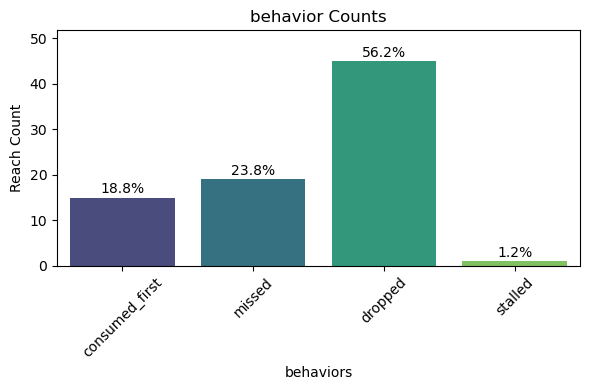

In [41]:
file_name = 'behavior_counts.png'

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=behavior_results_df_load, x='behavior', y='count', palette='viridis')
plt.title('behavior Counts')
plt.xlabel('behaviors')
plt.ylabel('Reach Count')
plt.xticks(rotation=45)

#plt.grid(axis='y') add gray lines

# Add reachType_rate labels (already calculated)
for i, p in enumerate(ax.patches):
    rate = behavior_results_df_load.loc[i, 'behavior_rate']
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, f'{rate:.1f}%', ha='center')

max_count = behavior_results_df_load['count'].max()
plt.ylim(0, max_count * 1.15)  # 15% taller than highest bar
plt.tight_layout()


if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)
    
plt.show()


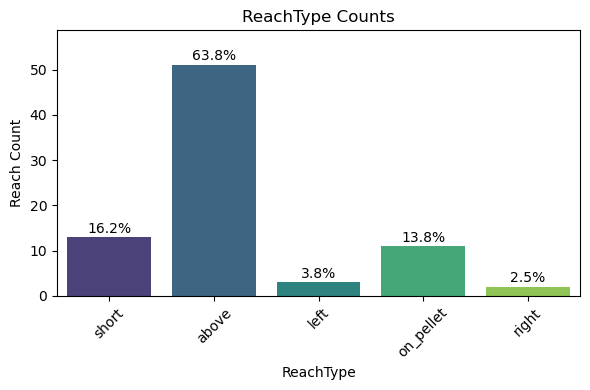

In [42]:
file_name = 'reachType_counts.png'

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=reachType_results_df_load, x='reachType', y='count', palette='viridis')
plt.title('ReachType Counts')
plt.xlabel('ReachType')
plt.ylabel('Reach Count')
plt.xticks(rotation=45)

#plt.grid(axis='y') add gray lines

# Add reachType_rate labels (already calculated)
for i, p in enumerate(ax.patches):
    rate = reachType_results_df_load.loc[i, 'reachType_rate']
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, f'{rate:.1f}%', ha='center')

max_count = reachType_results_df_load['count'].max()
plt.ylim(0, max_count * 1.15)  # 15% taller than highest bar
plt.tight_layout()

if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)
    
plt.show()

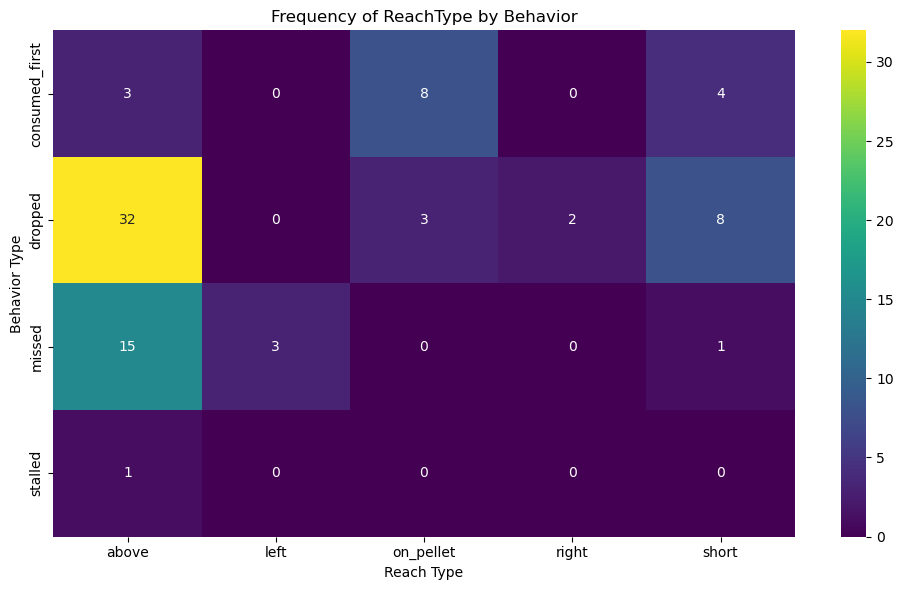

In [43]:

file_name = 'reachType_by_behavior.png'
# Assuming you already have session_df loaded
# If not: session_df = pd.read_excel("your_file.xlsx")

# Create a crosstab of behaviors and ReachType
cross_tab = pd.crosstab(df_final['behaviors'], df_final['ReachType'])

# Set up the plot
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="viridis")

# Titles and labels
plt.title("Frequency of ReachType by Behavior")
plt.ylabel("Behavior Type")
plt.xlabel("Reach Type")

# Adjust layout for better spacing
plt.tight_layout()


if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)
# Show the plot
plt.show()


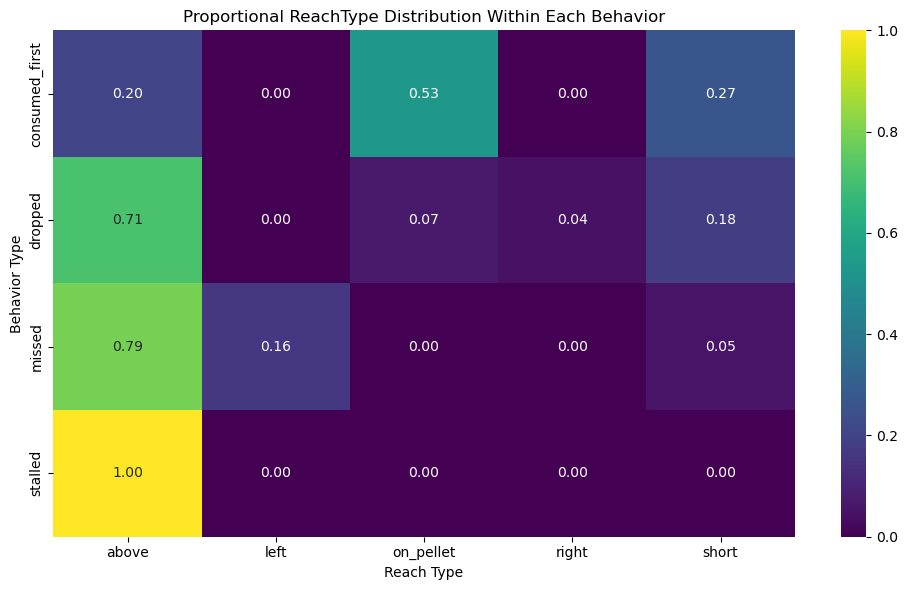

In [44]:
file_name = 'normalized_cross_tab_behavior_reachType.png'

# Normalize by row (behavior)
normalized_cross_tab = pd.crosstab(df_final['behaviors'], df_final['ReachType'], normalize='index')

plt.figure(figsize=(10, 6))
sns.heatmap(normalized_cross_tab, annot=True, fmt=".2f", cmap="viridis")
plt.title("Proportional ReachType Distribution Within Each Behavior")
plt.ylabel("Behavior Type")
plt.xlabel("Reach Type")
plt.tight_layout()


if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)
    
plt.show()


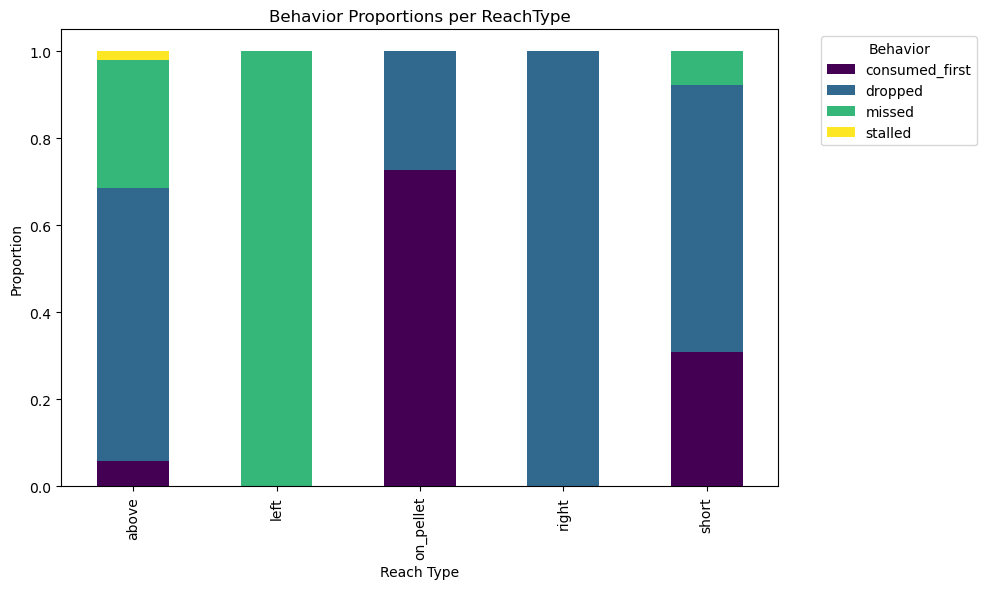

In [45]:
file_name = 'bar_plots_behavior_proportions.png'

# Group and normalize
behavior_reach_counts = pd.crosstab(df_final['ReachType'], df_final['behaviors'], normalize='index')

# Plot as stacked bars
behavior_reach_counts.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10, 6))
plt.title("Behavior Proportions per ReachType")
plt.ylabel("Proportion")
plt.xlabel("Reach Type")
plt.legend(title="Behavior", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)

plt.show()


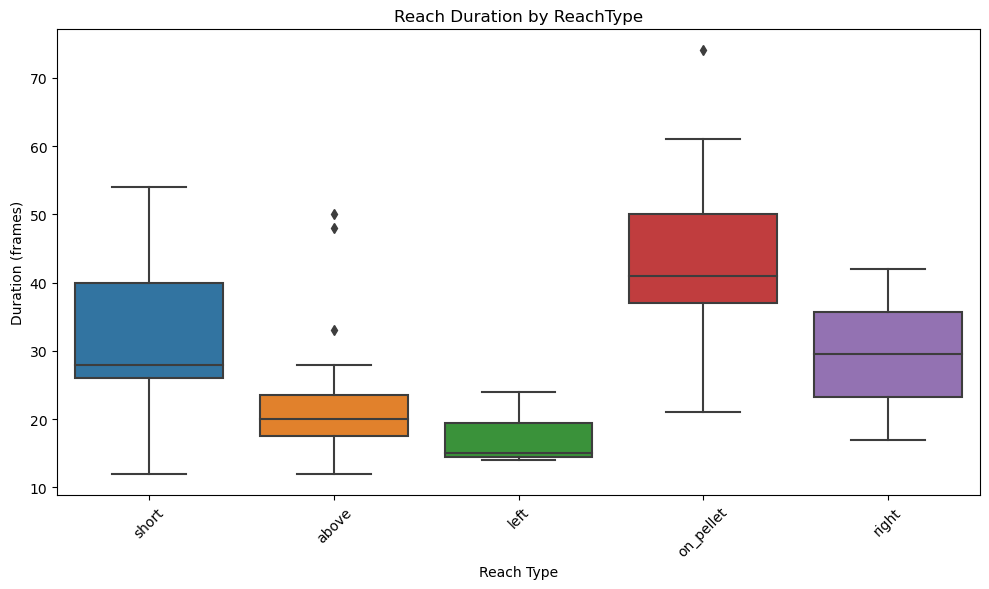

In [46]:
file_name = 'reach_duration_by_reachType.png'

# Example: Plot reach duration (reachEnd - reachInit) by ReachType
df_final['reachDuration'] = df_final['reachEnd'] - df_final['reachInit']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final, x='ReachType', y='reachDuration')
plt.title("Reach Duration by ReachType")
plt.ylabel("Duration (frames)")
plt.xlabel("Reach Type")
plt.xticks(rotation=45)
plt.tight_layout()

if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)

plt.show()


In [47]:
df_final_reachDuration_load.columns

Index(['T6000', 'T5000', 'reachInit', 'reachMax', 'reachEnd', 'stim',
       'behaviors', 'pellet_delivery', 'pellet_detected', 'ReachType',
       'reachDuration', 'movementTime', 'ReachInit_latency'],
      dtype='object')

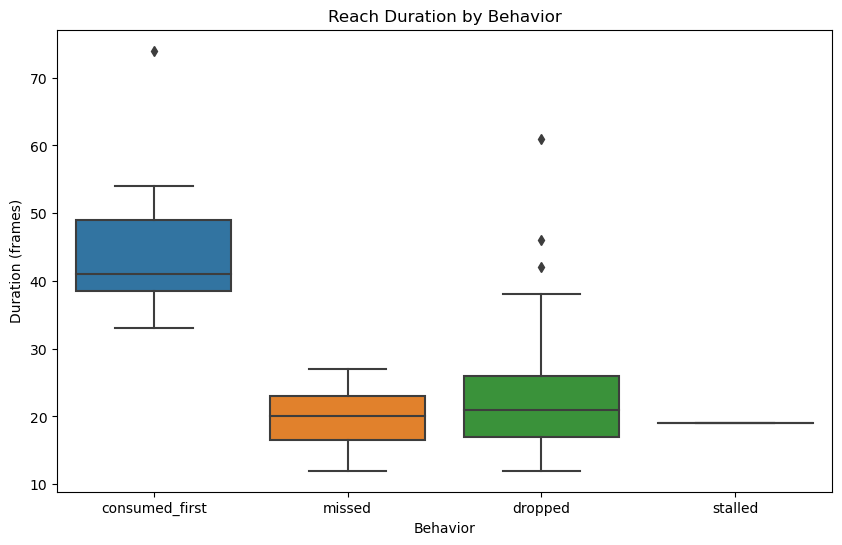

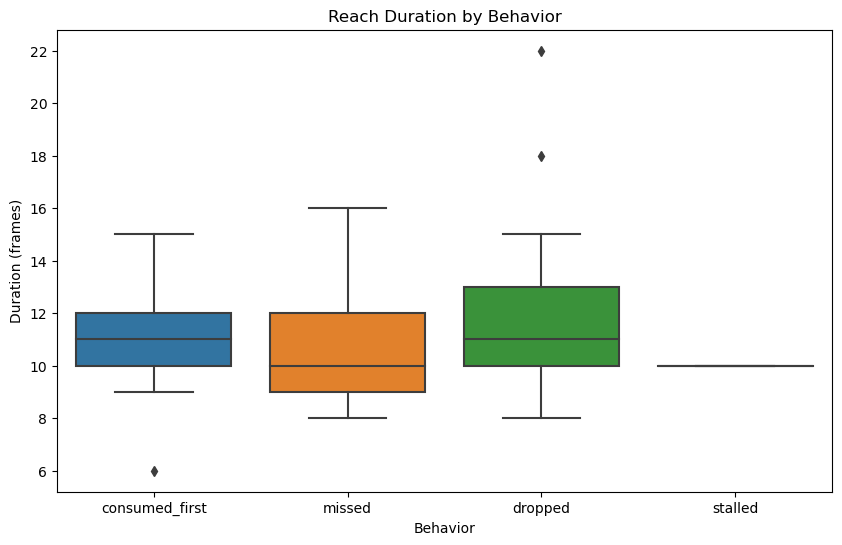

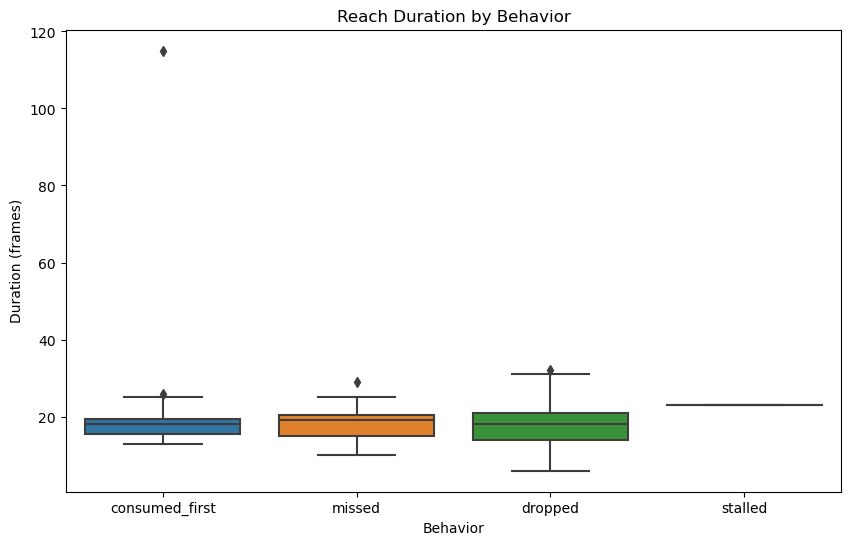

In [48]:
file_name = 'reach_duration_by_behavior.png'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final_reachDuration_load, x='behaviors', y='reachDuration')
plt.title("Reach Duration by Behavior")
plt.ylabel("Duration (frames)")
plt.xlabel("Behavior")
# Save plot
if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)
plt.show()

file_name = 'movementTime_by_reachType.png'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final_reachDuration_load, x='behaviors', y='movementTime')
plt.title("Reach Duration by Behavior")
plt.ylabel("Duration (frames)")
plt.xlabel("Behavior")
# Save plot
if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)
plt.show()

file_name = 'ReachInit_latency_by_reachType.png'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_final_reachDuration_load, x='behaviors', y='ReachInit_latency')
plt.title("Reach Duration by Behavior")
plt.ylabel("Duration (frames)")
plt.xlabel("Behavior")
# Save plot
if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)
plt.show()

c:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


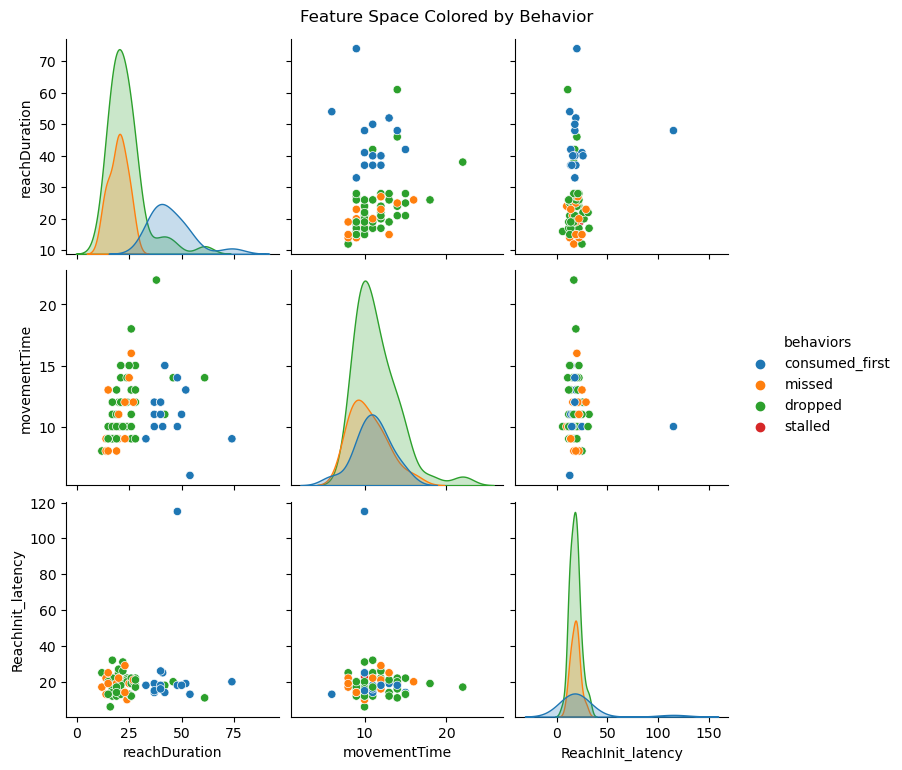

In [49]:
file_name = 'reach_durations_by_behavior.png'
# Optionally encode behavior and ReachType as colors
sns.pairplot(df_final_reachDuration_load, hue='behaviors', vars=['reachDuration', 'movementTime', 'ReachInit_latency'])
plt.suptitle("Feature Space Colored by Behavior", y=1.02)

# Save plot
if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)

plt.show()


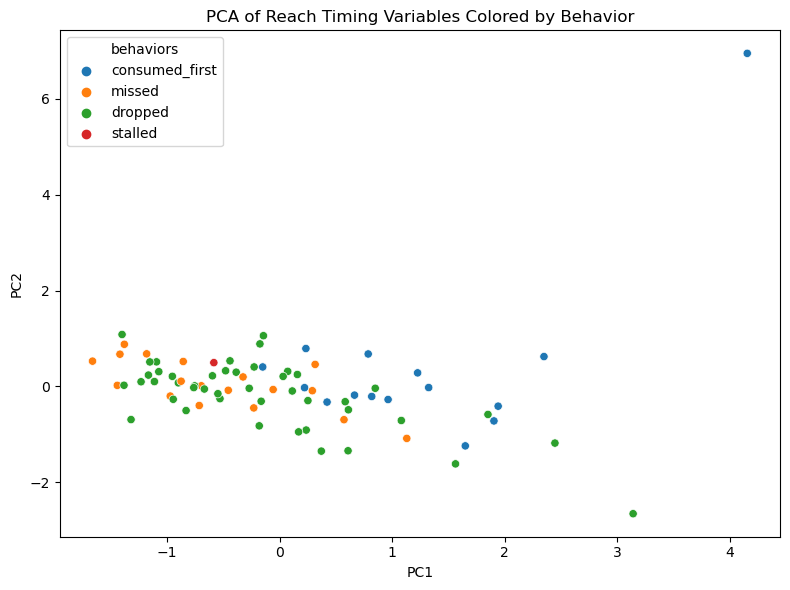

In [50]:
file_name = 'reach_duration_by_behavior_2D.png'


# Select and scale timing features
X = df_final_reachDuration_load[['reachDuration', 'movementTime', 'ReachInit_latency']]
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Plot
df_pca = df_final_reachDuration_load.copy()
df_pca['PC1'] = pca_result[:, 0]
df_pca['PC2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='behaviors')
plt.title('PCA of Reach Timing Variables Colored by Behavior')
plt.tight_layout()

# Save plot
if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)

plt.show()


c:\Users\user\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


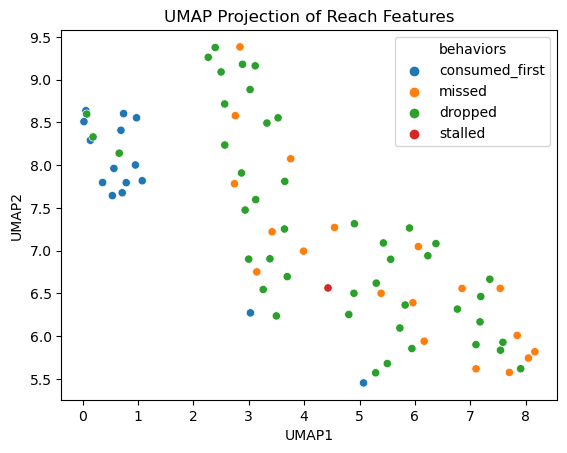

In [51]:
import umap
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Select features including reachDuration
X = df_final_reachDuration_load[['reachDuration', 'movementTime', 'ReachInit_latency']]  # or add 'ReachInit_latency'

# Scale features
X_scaled = StandardScaler().fit_transform(X)

# UMAP
umap_model = umap.UMAP(random_state=42)
umap_result = umap_model.fit_transform(X_scaled)

# Add to DataFrame
df_final_reachDuration_load['UMAP1'] = umap_result[:, 0]
df_final_reachDuration_load['UMAP2'] = umap_result[:, 1]

# Plot
sns.scatterplot(data=df_final_reachDuration_load, x='UMAP1', y='UMAP2', hue='behaviors')
plt.title("UMAP Projection of Reach Features")
plt.show()



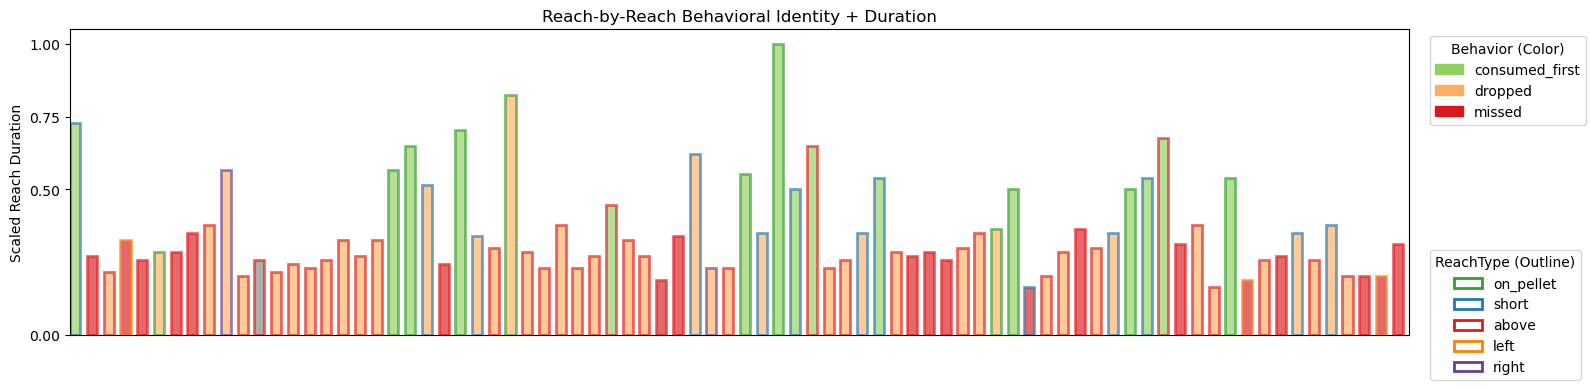

In [52]:
file_name = 'reach-by-reach_barPlot_small.png'

behavior_palette = {
    'consumed_first': '#91cf60',  # soft green
    'dropped': '#fdae61',         # peach/orange
    'missed': '#d7191c',          # soft red
}

reachtype_palette = {
    'on_pellet': '#33a02c',   # vivid blue
    'short':     '#1f78b4',   # strong green
    'above':     '#e31a1c',   # red
    'left':      '#ff7f00',   # orange
    'right':     '#6a3d9a',   # purple
}



fig, ax = plt.subplots(figsize=(len(df_final) * 0.2, 4))

# Normalize reachDuration to control bar height
max_duration = df_final_reachDuration_load['reachDuration'].max()
df_final_reachDuration_load['norm_duration'] = df_final_reachDuration_load['reachDuration'] / max_duration



    # Draw vertical bars
for i, row in df_final_reachDuration_load.iterrows():
    behavior_color = behavior_palette.get(row['behaviors'], 'gray')
    edge_color = reachtype_palette.get(row['ReachType'], 'black')
    
    ax.add_patch(patches.Rectangle(
        (i, 0),
        width=0.60,
        height=row['norm_duration'],
        facecolor=behavior_color,
        edgecolor=edge_color,
        linewidth=2,
        alpha=0.65 # ensure solid fill
    ))

# 🔳 Add faint vertical gridlines between each bar
for i in range(len(df_final_reachDuration_load)):
    ax.axvline(i, color='white', lw=0, zorder=0)

# Axis settings
ax.set_xlim(0, len(df_final_reachDuration_load))
ax.set_ylim(0, 1.05)
ax.set_xticks([])
ax.set_yticks([0, 0.5, 0.75, 1])
ax.set_ylabel('Scaled Reach Duration')
ax.set_title('Reach-by-Reach Behavioral Identity + Duration')

# Legends
behavior_legend = [patches.Patch(color=c, label=l) for l, c in behavior_palette.items()]
reachtype_legend = [patches.Patch(edgecolor=c, facecolor='white', linewidth=2, label=l) for l, c in reachtype_palette.items()]

# Add legends
legend1 = ax.legend(handles=behavior_legend, title='Behavior (Color)', bbox_to_anchor=(1.01, 1), loc='upper left')
ax.add_artist(legend1)
ax.legend(handles=reachtype_legend, title='ReachType (Outline)', bbox_to_anchor=(1.01, 0.3), loc='upper left')

plt.tight_layout()

# Save plot
if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)

plt.show()


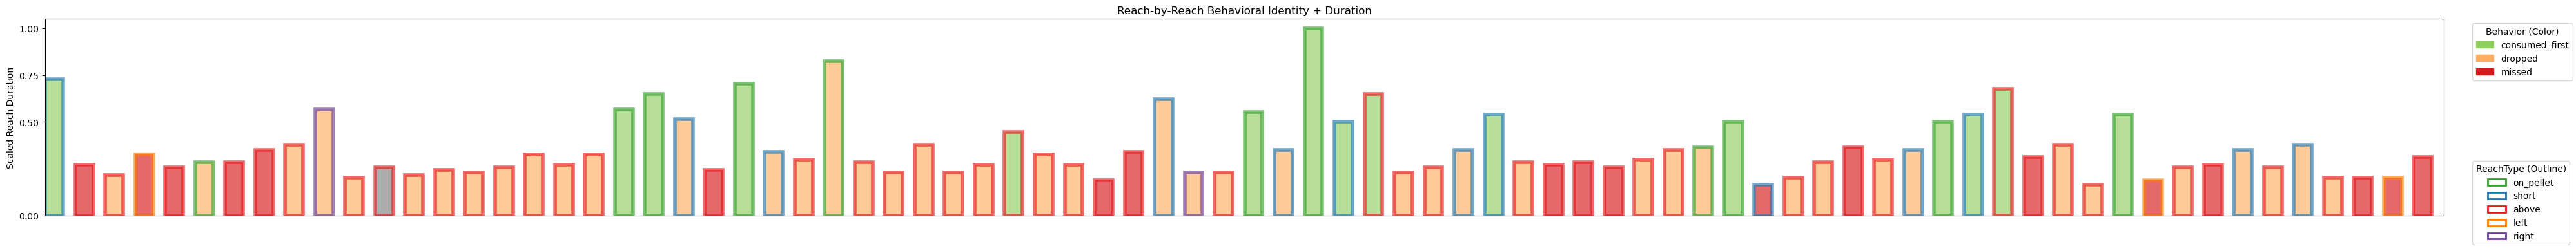

In [53]:
file_name = 'reach-by-reach_barPlot_medium.png'


# Setup color palettes
behavior_palette = dict(zip(df_final['behaviors'].dropna().unique(), sns.color_palette('Set2')))
reachtype_palette = dict(zip(df_final['ReachType'].dropna().unique(), sns.color_palette('Set1')))


behavior_palette = {
    'consumed_first': '#91cf60',  # soft green
    'dropped': '#fdae61',         # peach/orange
    'missed': '#d7191c',          # soft red
}

reachtype_palette = {
    'on_pellet': '#33a02c',   # vivid blue
    'short':     '#1f78b4',   # strong green
    'above':     '#e31a1c',   # red
    'left':      '#ff7f00',   # orange
    'right':     '#6a3d9a',   # purple
}
#33a02c
fig, ax = plt.subplots(figsize=(len(df_final) * 0.5, 4))

# Normalize reachDuration to control bar height
max_duration = df_final_reachDuration_load['reachDuration'].max()
df_final_reachDuration_load['norm_duration'] = df_final_reachDuration_load['reachDuration'] / max_duration



    # Draw vertical bars
for i, row in df_final_reachDuration_load.iterrows():
    behavior_color = behavior_palette.get(row['behaviors'], 'gray')
    edge_color = reachtype_palette.get(row['ReachType'], 'black')
    
    ax.add_patch(patches.Rectangle(
        (i, 0),
        width=0.60,
        height=row['norm_duration'],
        facecolor=behavior_color,
        edgecolor=edge_color,
        linewidth=4,
        alpha=0.65 # ensure solid fill
    ))

# 🔳 Add faint vertical gridlines between each bar
for i in range(len(df_final_reachDuration_load)):
    ax.axvline(i, color='white', lw=0, zorder=0)

# Axis settings
ax.set_xlim(0, len(df_final_reachDuration_load))
ax.set_ylim(0, 1.05)
ax.set_xticks([])
ax.set_yticks([0, 0.5, 0.75, 1])
ax.set_ylabel('Scaled Reach Duration')
ax.set_title('Reach-by-Reach Behavioral Identity + Duration')

# Legends
behavior_legend = [patches.Patch(color=c, label=l) for l, c in behavior_palette.items()]
reachtype_legend = [patches.Patch(edgecolor=c, facecolor='white', linewidth=2, label=l) for l, c in reachtype_palette.items()]

# Add legends
legend1 = ax.legend(handles=behavior_legend, title='Behavior (Color)', bbox_to_anchor=(1.01, 1), loc='upper left')
ax.add_artist(legend1)
ax.legend(handles=reachtype_legend, title='ReachType (Outline)', bbox_to_anchor=(1.01, 0.3), loc='upper left')

plt.tight_layout()


# Save plot
if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)
    
plt.show()


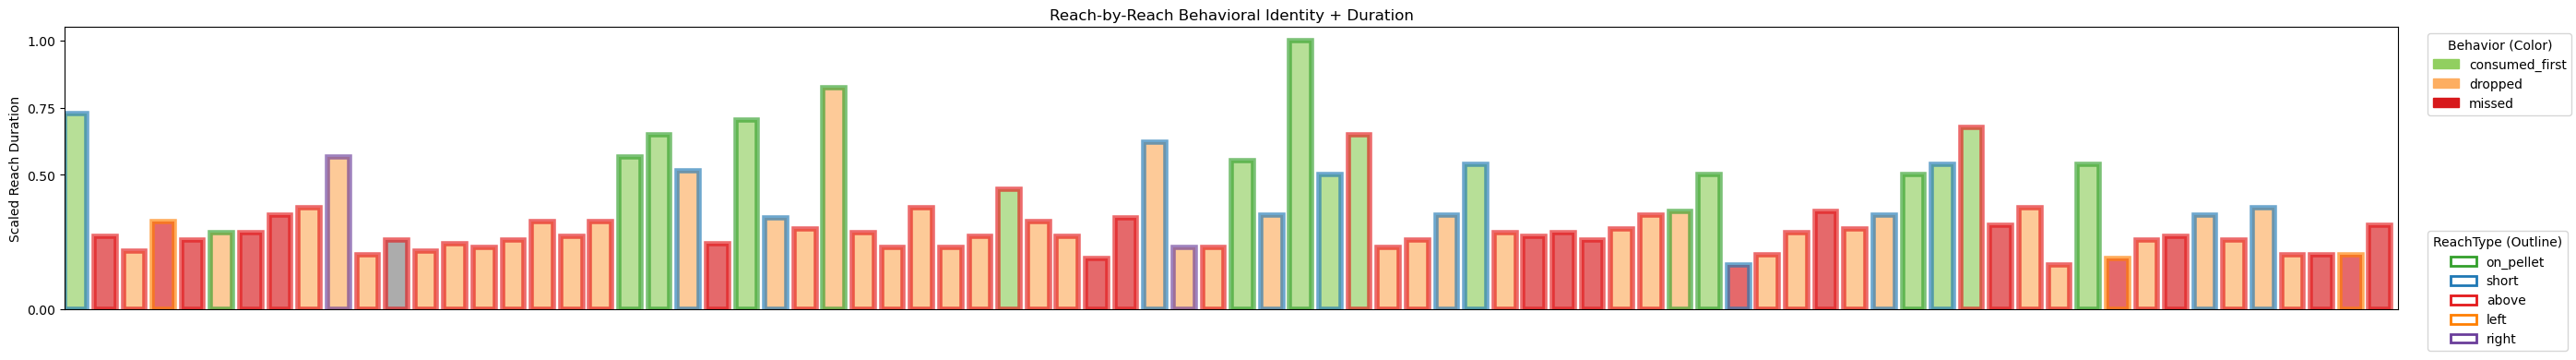

In [54]:
file_name = 'reach-by-reach_barPlot_large.png'


# Setup color palettes
behavior_palette = dict(zip(df_final['behaviors'].dropna().unique(), sns.color_palette('Set2')))
reachtype_palette = dict(zip(df_final['ReachType'].dropna().unique(), sns.color_palette('Set1')))


behavior_palette = {
    'consumed_first': '#91cf60',  # soft green
    'dropped': '#fdae61',         # peach/orange
    'missed': '#d7191c',          # soft red
}

reachtype_palette = {
    'on_pellet': '#33a02c',   # vivid blue
    'short':     '#1f78b4',   # strong green
    'above':     '#e31a1c',   # red
    'left':      '#ff7f00',   # orange
    'right':     '#6a3d9a',   # purple
}
#33a02c
fig, ax = plt.subplots(figsize=(len(df_final) * 0.35, 4))

# Normalize reachDuration to control bar height
max_duration = df_final_reachDuration_load['reachDuration'].max()
df_final_reachDuration_load['norm_duration'] = df_final_reachDuration_load['reachDuration'] / max_duration



    # Draw vertical bars
for i, row in df_final_reachDuration_load.iterrows():
    behavior_color = behavior_palette.get(row['behaviors'], 'gray')
    edge_color = reachtype_palette.get(row['ReachType'], 'black')
    
    ax.add_patch(patches.Rectangle(
        (i, 0),
        width=0.75,
        height=row['norm_duration'],
        facecolor=behavior_color,
        edgecolor=edge_color,
        linewidth=4,
        alpha=0.65 # ensure solid fill
    ))

# 🔳 Add faint vertical gridlines between each bar
for i in range(len(df_final_reachDuration_load)):
    ax.axvline(i, color='white', lw=0, zorder=0)

# Axis settings
ax.set_xlim(0, len(df_final_reachDuration_load))
ax.set_ylim(0, 1.05)
ax.set_xticks([])
ax.set_yticks([0, 0.5, 0.75, 1])
ax.set_ylabel('Scaled Reach Duration')
ax.set_title('Reach-by-Reach Behavioral Identity + Duration')

# Legends
behavior_legend = [patches.Patch(color=c, label=l) for l, c in behavior_palette.items()]
reachtype_legend = [patches.Patch(edgecolor=c, facecolor='white', linewidth=2, label=l) for l, c in reachtype_palette.items()]

# Add legends
legend1 = ax.legend(handles=behavior_legend, title='Behavior (Color)', bbox_to_anchor=(1.01, 1), loc='upper left')
ax.add_artist(legend1)
ax.legend(handles=reachtype_legend, title='ReachType (Outline)', bbox_to_anchor=(1.01, 0.3), loc='upper left')

plt.tight_layout()


# Save plot
if os.path.exists(os.path.join(plot_save_path, file_name)):
    print(f"⚠️Warning: behavior_counts plot already exists at {os.path.join(plot_save_path, file_name)}⚠️")
else:
    plt.savefig(os.path.join(plot_save_path, file_name), dpi=300)
    
plt.show()


### Look at the behavior results 

In [55]:
df_consumed_first = df_final[df_final['behaviors']=='consumed_first']
df_dropped = df_final[df_final['behaviors']=='dropped']
df_missed = df_final[df_final['behaviors']=='missed']

In [56]:
df_consumed_first

,T6000,T5000,reachInit,reachMax,reachEnd,stim,behaviors,pellet_delivery,pellet_detected,ReachType,reachDuration,movementTime,ReachInit_latency
0,1805,1952,1965,1971,2019,0,consumed_first,1950,1874,short,54,6,13
19,65250,65466,65480,65495,65522,0,consumed_first,65463,65312,on_pellet,42,15,14
20,67477,67657,67772,67782,67820,0,consumed_first,67655,67541,on_pellet,48,10,115
23,78756,79208,79227,79240,79279,0,consumed_first,79206,78825,on_pellet,52,13,19
32,112634,112809,112827,112836,112860,0,consumed_first,112807,112695,above,33,9,18
40,137679,138007,138032,138042,138073,0,consumed_first,138005,137743,on_pellet,41,10,25
42,144643,144900,144920,144929,144994,0,consumed_first,144898,144707,on_pellet,74,9,20
43,146909,147164,147183,147195,147220,0,consumed_first,147162,146975,short,37,12,19
44,151405,151775,151793,151807,151841,0,consumed_first,151773,151469,above,48,14,18
48,167789,168085,168111,168123,168151,0,consumed_first,168083,167856,short,40,12,26


In [59]:
df_dropped

,T6000,T5000,reachInit,reachMax,reachEnd,stim,behaviors,pellet_delivery,pellet_detected,ReachType,reachDuration,movementTime,ReachInit_latency
2,8317,8681,8687,8697,8703,0,dropped,8679,8378,above,16,10,6
5,17228,17607,17623,17637,17644,0,dropped,17604,17300,on_pellet,21,14,16
8,25668,26147,26169,26184,26197,0,dropped,26145,25729,above,28,15,22
9,30306,30559,30577,30588,30619,0,dropped,30557,30368,right,42,11,18
10,32636,32925,32944,32954,32959,0,dropped,32923,32698,above,15,10,19
12,40789,40928,40948,40957,40964,0,dropped,40926,40849,above,16,9,20
13,43421,43901,43918,43927,43936,0,dropped,43898,43486,above,18,9,17
14,48036,48407,48439,48450,48456,0,dropped,48404,48101,above,17,11,32
15,51898,52121,52135,52148,52154,0,dropped,52118,51967,above,19,13,14
16,54132,54277,54299,54313,54323,0,dropped,54275,54197,above,24,14,22


In [60]:
df_missed

,T6000,T5000,reachInit,reachMax,reachEnd,stim,behaviors,pellet_delivery,pellet_detected,ReachType,reachDuration,movementTime,ReachInit_latency
1,5938,6232,6252,6261,6272,0,missed,6230,6004,above,20,9,20
3,12505,12725,12735,12745,12759,0,missed,12723,12569,left,24,10,10
4,14767,15062,15076,15085,15095,0,missed,15060,14829,above,19,9,14
6,20488,20630,20646,20656,20667,0,missed,20628,20552,above,21,10,16
7,22874,23089,23109,23125,23135,0,missed,23086,22935,above,26,16,20
22,74331,74623,74636,74646,74654,0,missed,74621,74393,above,18,10,13
35,121884,122102,122115,122124,122129,0,missed,122100,121949,above,14,9,13
36,126236,126527,126546,126560,126571,0,missed,126525,126299,above,25,14,19
50,174368,174582,174600,174611,174620,0,missed,174580,174429,above,20,11,18
51,177381,177826,177842,177854,177863,0,missed,177823,177447,above,21,12,16
